<a href="https://colab.research.google.com/github/lzhanggithub/CrowdComputing/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install edit_distance
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import edit_distance
import scipy.stats as stats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def extract_counting(df):
    df_groupedby_worker = df.groupby("ASSIGNMENT:worker_id").count()
    # print(df_groupedby_worker.head)
    counting = []
    for i in range(16):
        counting.append(df_groupedby_worker[df_groupedby_worker["OUTPUT:result1"] == i].count()["OUTPUT:result1"])
    print(counting)
    return counting

In [ ]:
def viusalize_tasks(c1, c2, c3, type1, type2, type3, title):
    x = np.array(range(0, 16))
    plt.title(title)
    plt.xlabel("finished tasks")
    plt.ylabel("number of workers")
    plt.plot(x, c1, color="red", label=type1)
    plt.plot(x, c3, color="blue", label=type3)
    plt.plot(x, c2, color="green", label=type2)
    plt.legend()
    plt.show()

In [ ]:
df1 = pd.read_csv("FILTERED-AVATAR-RESULTS.tsv", delimiter = '\t', quoting = 3)
type1 = "Evolution AVATAR"
print(df1.columns)
# clean data
df1.dropna(how='all', inplace = True) 
df1 = df1[df1["OUTPUT:result1"] !="S"]

# extract status
df1_approved = df1[df1["ASSIGNMENT:status"] == "APPROVED"]
df1_expired = df1[df1["ASSIGNMENT:status"] == "EXPIRED"]
df1_skipped = df1[df1["ASSIGNMENT:status"]=="SKIPPED"]

c1_approved = extract_counting(df1_approved)
c1_expired = extract_counting(df1_expired)
c1_skipped= extract_counting(df1_skipped)

df2 = pd.read_csv("FILTERED-STATIC-RESULTS.tsv", delimiter = '\t', quoting = 3)
type2 = "Static Avatar"

# clean data
df2.dropna(how='all', inplace = True) 
df2 = df2[df2["OUTPUT:result1"] !="S"]

df2_approved = df2[df2["ASSIGNMENT:status"] == "APPROVED"]
df2_expired = df2[df2["ASSIGNMENT:status"] == "EXPIRED"]
df2_skipped = df2[df2["ASSIGNMENT:status"] == "SKIPPED"]

c2_approved = extract_counting(df2_approved)
c2_expired = extract_counting(df2_expired)
c2_skipped = extract_counting(df2_skipped)

df3 = pd.read_csv("FILTERED-DEFAULT-RESULTS.tsv", delimiter = '\t', quoting = 3)
type3 = "No AVATAR"
# clean data
df3.dropna(how='all', inplace = True)
df3 = df3[df3["OUTPUT:result1"] !="S"]

df3_approved = df3[df3["ASSIGNMENT:status"] == "APPROVED"] 
df3_expired = df3[df3["ASSIGNMENT:status"] == "EXPIRED"] 
df3_skipped = df3[df3["ASSIGNMENT:status"] == "SKIPPED"] 

c3_approved = extract_counting(df3_approved)
c3_expired = extract_counting(df3_expired)
c3_skipped = extract_counting(df3_skipped)

Index(['INPUT:imageURL', 'OUTPUT:result1', 'OUTPUT:result2', 'OUTPUT:result3',
       'OUTPUT:result4', 'OUTPUT:result5', 'GOLDEN:result1', 'GOLDEN:result2',
       'GOLDEN:result3', 'GOLDEN:result4', 'GOLDEN:result5', 'HINT:text',
       'HINT:default_language', 'ASSIGNMENT:task_id',
       'ASSIGNMENT:assignment_id', 'ASSIGNMENT:worker_id',
       'ASSIGNMENT:status'],
      dtype='object')
[0, 72, 52, 47, 27, 25, 22, 13, 8, 8, 2, 5, 2, 2, 1, 7]
[339, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[44, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 20, 15, 5, 11, 11, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0]
[194, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[22, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 22, 18, 17, 7, 8, 6, 3, 2, 2, 2, 0, 0, 0, 0, 0]
[175, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[26, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
df1.to_csv("df1_clean.csv", index=False)
df2.to_csv("df2_clean.csv", index=False)
df3.to_csv("df3_clean.csv", index=False)

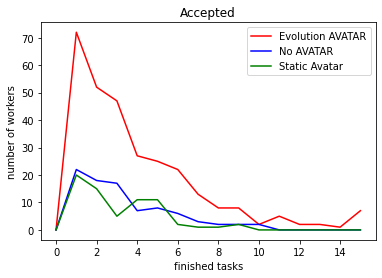

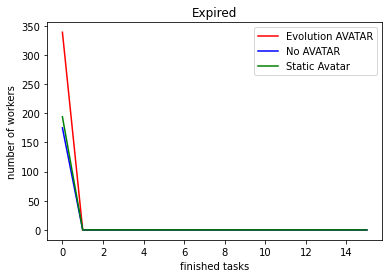

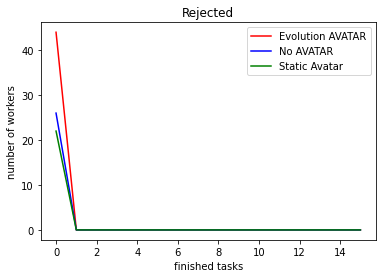

In [ ]:
viusalize_tasks(c1_approved, c2_approved, c3_approved, type1, type2, type3, title="Accepted")
viusalize_tasks(c1_expired, c2_expired, c3_expired, type1, type2, type3, title = "Expired")
viusalize_tasks(c1_skipped, c2_skipped, c3_skipped, type1, type2, type3, title = "Rejected")

In [ ]:
# captchas approved
df1_captchas = df1_approved[~df1_approved["GOLDEN:result1"].isna()]
df2_captchas = df2_approved[~df2_approved["GOLDEN:result1"].isna()]
df3_captchas = df3_approved[~df3_approved["GOLDEN:result1"].isna()]

In [ ]:
%%capture
from statistics import mean

def edit_distance(s1, s2):
    m=len(s1)+1
    n=len(s2)+1

    tbl = {}
    for i in range(m): tbl[i,0]=i
    for j in range(n): tbl[0,j]=j
    for i in range(1, m):
        for j in range(1, n):
            cost = 0 if s1[i-1] == s2[j-1] else 1
            tbl[i,j] = min(tbl[i, j-1]+1, tbl[i-1, j]+1, tbl[i-1, j-1]+cost)

    return tbl[i,j]

print(edit_distance("Helloworld", "HalloWorld"))

for i in range(1,6):
  # edit_distance(x["OUTPUT:result"+str(i)], x["GOLDEN:result"+str(i)])
  df1_captchas['without_edit_distance_'+str(i)] = df1_captchas.apply(lambda x: edit_distance(x["OUTPUT:result"+str(i)], x["GOLDEN:result"+str(i)]), axis=1)
  df2_captchas['without_edit_distance_'+str(i)] = df2_captchas.apply(lambda x: edit_distance(x["OUTPUT:result"+str(i)], x["GOLDEN:result"+str(i)]), axis=1)
  df3_captchas['without_edit_distance_'+str(i)] = df3_captchas.apply(lambda x: edit_distance(x["OUTPUT:result"+str(i)], x["GOLDEN:result"+str(i)]), axis=1)

for i in range(1,6):
  # edit_distance(x["OUTPUT:result"+str(i)], x["GOLDEN:result"+str(i)])
  df1_captchas['edit_distance_'+str(i)] = df1_captchas.apply(lambda x: edit_distance(x["OUTPUT:result"+str(i)].lower().replace(" ", ""), x["GOLDEN:result"+str(i)].lower().replace(" ", "")), axis=1)
  df2_captchas['edit_distance_'+str(i)] = df2_captchas.apply(lambda x: edit_distance(x["OUTPUT:result"+str(i)].lower().replace(" ", ""), x["GOLDEN:result"+str(i)].lower().replace(" ", "")), axis=1)
  df3_captchas['edit_distance_'+str(i)] = df3_captchas.apply(lambda x: edit_distance(x["OUTPUT:result"+str(i)].lower().replace(" ", ""), x["GOLDEN:result"+str(i)].lower().replace(" ", "")), axis=1)


def compute_score(el1,el2,el3,el4,el5):
  acc = []
  # acc.append(((10 - el1)/10)*100)
  # acc.append(((10 - el2)/10)*100)
  # acc.append(((10 - el3)/10)*100)
  # acc.append(((10 - el4)/10)*100)
  # acc.append(((10 - el5)/10)*100)
  return sum([el1,el2,el3,el4,el5])



# edit_distance(x["OUTPUT:result"+str(i)], x["GOLDEN:result"+str(i)])
df1_captchas['avg_score_per_worker_per_tasksuite'] = df1_captchas.apply(lambda x: compute_score(x['edit_distance_1'],x['edit_distance_2'],x['edit_distance_3'],x['edit_distance_4'],x['edit_distance_5']), axis=1)
df2_captchas['avg_score_per_worker_per_tasksuite'] = df2_captchas.apply(lambda x: compute_score(x['edit_distance_1'],x['edit_distance_2'],x['edit_distance_3'],x['edit_distance_4'],x['edit_distance_5']), axis=1)
df3_captchas['avg_score_per_worker_per_tasksuite'] = df3_captchas.apply(lambda x: compute_score(x['edit_distance_1'],x['edit_distance_2'],x['edit_distance_3'],x['edit_distance_4'],x['edit_distance_5']), axis=1)

df1_captchas['without_avg_score_per_worker_per_tasksuite'] = df1_captchas.apply(lambda x: compute_score(x['without_edit_distance_1'],x['without_edit_distance_2'],x['without_edit_distance_3'],x['without_edit_distance_4'],x['without_edit_distance_5']), axis=1)
df2_captchas['without_avg_score_per_worker_per_tasksuite'] = df2_captchas.apply(lambda x: compute_score(x['without_edit_distance_1'],x['without_edit_distance_2'],x['without_edit_distance_3'],x['without_edit_distance_4'],x['without_edit_distance_5']), axis=1)
df3_captchas['without_avg_score_per_worker_per_tasksuite'] = df3_captchas.apply(lambda x: compute_score(x['without_edit_distance_1'],x['without_edit_distance_2'],x['without_edit_distance_3'],x['without_edit_distance_4'],x['without_edit_distance_5']), axis=1)



In [ ]:
m1_norm=(df1_captchas["avg_score_per_worker_per_tasksuite"]-df1_captchas["avg_score_per_worker_per_tasksuite"].min())/(df1_captchas["avg_score_per_worker_per_tasksuite"].max()-df1_captchas["avg_score_per_worker_per_tasksuite"].min())
m2_norm=(df2_captchas["avg_score_per_worker_per_tasksuite"]-df2_captchas["avg_score_per_worker_per_tasksuite"].min())/(df2_captchas["avg_score_per_worker_per_tasksuite"].max()-df2_captchas["avg_score_per_worker_per_tasksuite"].min())
m3_norm=(df3_captchas["avg_score_per_worker_per_tasksuite"]-df3_captchas["avg_score_per_worker_per_tasksuite"].min())/(df3_captchas["avg_score_per_worker_per_tasksuite"].max()-df3_captchas["avg_score_per_worker_per_tasksuite"].min())
m1= m1_norm.mean()
v1 = m1_norm.var()
print(1-m1,v1)

m2= m2_norm.mean()
v2 = m2_norm.var()
print(1-m2,v2)

m3 = m3_norm.mean()
v3 = m3_norm.var()
print(1-m3,v3)


print(stats.ttest_ind(a=m1_norm,b=m2_norm,equal_var=False))
print(stats.ttest_ind(a=m1_norm,b=m3_norm,equal_var=False))
print(stats.ttest_ind(a=m3_norm,b=m2_norm,equal_var=False))

0.9544835732447094 0.0038421397405809412
0.842196400091137 0.030846521899153448
0.8581897220928428 0.025705087935839133
Ttest_indResult(statistic=-9.08698758229861, pvalue=5.707214581032969e-17)
Ttest_indResult(statistic=-9.864199017259415, pvalue=3.442679750846896e-20)
Ttest_indResult(statistic=-1.037163175058625, pvalue=0.3002510200326917)


In [ ]:
m1_norm=(df1_captchas["without_avg_score_per_worker_per_tasksuite"]-df1_captchas["without_avg_score_per_worker_per_tasksuite"].min())/(df1_captchas["without_avg_score_per_worker_per_tasksuite"].max()-df1_captchas["without_avg_score_per_worker_per_tasksuite"].min())
m2_norm=(df2_captchas["without_avg_score_per_worker_per_tasksuite"]-df2_captchas["without_avg_score_per_worker_per_tasksuite"].min())/(df2_captchas["without_avg_score_per_worker_per_tasksuite"].max()-df2_captchas["without_avg_score_per_worker_per_tasksuite"].min())
m3_norm=(df3_captchas["without_avg_score_per_worker_per_tasksuite"]-df3_captchas["without_avg_score_per_worker_per_tasksuite"].min())/(df3_captchas["without_avg_score_per_worker_per_tasksuite"].max()-df3_captchas["without_avg_score_per_worker_per_tasksuite"].min())
m1= m1_norm.mean()
v1 = m1_norm.var()
print(1-m1,v1)

m2= m2_norm.mean()
v2 = m2_norm.var()
print(1-m2,v2)

m3 = m3_norm.mean()
v3 = m3_norm.var()
print(1-m3,v3)

print(stats.ttest_ind(a=m1_norm,b=m2_norm,equal_var=False))
print(stats.ttest_ind(a=m1_norm,b=m3_norm,equal_var=False))
print(stats.ttest_ind(a=m3_norm,b=m2_norm,equal_var=False))

0.9488288675363903 0.0038620320791051656
0.8596004236823842 0.022851968616002118
0.8698746867167919 0.019587976480436507
Ttest_indResult(statistic=-8.33989279993322, pvalue=7.103234082218009e-15)
Ttest_indResult(statistic=-9.187018445550262, pvalue=4.763433167908887e-18)
Ttest_indResult(statistic=-0.7699386982423312, pvalue=0.44176113311759346)


ASSIGNMENT:worker_id
1                       55
2                       43
3                       39
4                       20
5                       17
6                       13
7                       10
10                      10
8                        8
9                        2
dtype: int64
1489ed8b1896f56ea20144fc9666b988    10
b03440411008264d4113ea36ebe2f96f    10
e99518a6ab21d9d3b716a319309eb686    10
1d0a130150bf83d7dc157a43539de609    10
6d3a848a22863f0ff96c99b01e9d12e7    10
                                    ..
d22a465e2d4cd880c7b0ed5d8f6b0aa8     1
89d3cdc42f39e504a624efc8197872f3     1
89895b79a674c701b46c537df8ab55ed     1
0612d63c4ebcbcfb3187d11b329b90bc     1
ce6a3f63c047b5cbf00de6d77a2d0660     1
Name: ASSIGNMENT:worker_id, Length: 217, dtype: int64


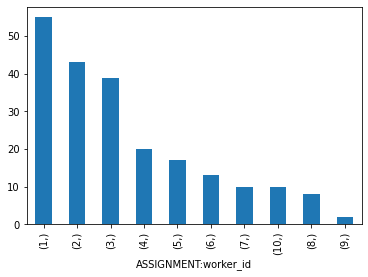

ASSIGNMENT:worker_id
1                       20
2                       15
4                       11
5                       11
3                        5
6                        2
9                        2
7                        1
8                        1
dtype: int64
f8058ebbc2531665094a5f08b80f58c5    9
cb4318314d8fb387f403c75e8c62aef0    9
c21837cbe28d0fdf96766d38e5003306    8
ccf28429929e31534ae796193e8c2238    7
370d279397210e8314342d95d7217600    6
                                   ..
7d45f6f154ceb7676e30eee514352cdb    1
6309a58e8603aca84a77315b7fb01da0    1
8bc77dd4ea0c6545bf0a8e313cb1af3a    1
394e0c9261128eb4e3858f7d7e11523f    1
1ac70ff4a379d9f4a97035d19f70c6d9    1
Name: ASSIGNMENT:worker_id, Length: 68, dtype: int64


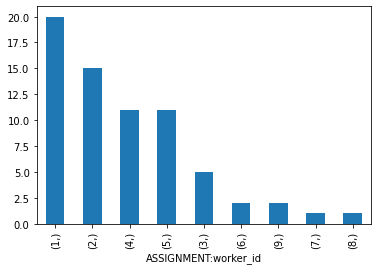

ASSIGNMENT:worker_id
1                       19
2                       18
3                       17
5                        8
4                        7
6                        6
7                        3
8                        2
9                        2
10                       2
dtype: int64
bbcad3e32725336d96df32df283ed0fe    10
f19da9c76af32a3eb1a6bed0cb86f00f    10
2136a3aad80ad566166df8e71dad7322     9
296fc8d372c9ef0583d966630f69fe65     9
3929d7c950991930645617d8b6ae7aa6     8
                                    ..
761795430c8b45ebe583840b58753a77     1
73e07b8ef092048a7eb08d471b4ccc99     1
3da4113e505856d243e974a5cd07284a     1
797785d3f3966b9cb0d0ac94be81ff6c     1
e4ff12f0b5e18a0325e03c9f6870726d     1
Name: ASSIGNMENT:worker_id, Length: 84, dtype: int64


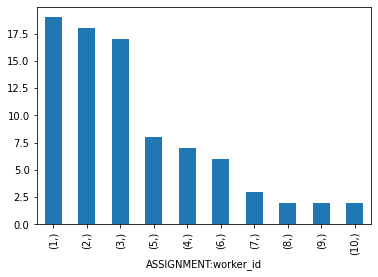

In [ ]:
df1_captchas['ASSIGNMENT:worker_id'].value_counts().to_frame().value_counts().plot.bar()
print(df1_captchas['ASSIGNMENT:worker_id'].value_counts().to_frame().value_counts())
print(df1_captchas['ASSIGNMENT:worker_id'].value_counts())
plt.show()
# 10/217 = 0.04

df2_captchas['ASSIGNMENT:worker_id'].value_counts().to_frame().value_counts().plot.bar()
print(df2_captchas['ASSIGNMENT:worker_id'].value_counts().to_frame().value_counts())
print(df2_captchas['ASSIGNMENT:worker_id'].value_counts())
plt.show()
# 0/68 = 0

df3_captchas['ASSIGNMENT:worker_id'].value_counts().to_frame().value_counts().plot.bar()
print(df3_captchas['ASSIGNMENT:worker_id'].value_counts().to_frame().value_counts())
print(df3_captchas['ASSIGNMENT:worker_id'].value_counts())
# 2/84 = 0.02

In [ ]:
# questionnaire result
df1_quest = df1[df1["GOLDEN:result1"].isna()]
df1_quest["INPUT:imageURL"]
df1_quest.to_csv("avatar_questionaaire.csv",index = False)

df2_quest = df2[df2["GOLDEN:result1"].isna()]
df2_quest["INPUT:imageURL"]
df2_quest.to_csv("STATIC_questionaaire.csv",index = False)

df3_quest = df3[df3["GOLDEN:result1"].isna()]
df3_quest["INPUT:imageURL"]
df3_quest.to_csv("NO_avatar_questionaaire.csv",index = False)

In [ ]:
df1_captchas = df1[~df1["GOLDEN:result1"].isna()]
df2_captchas = df2[~df2["GOLDEN:result1"].isna()]
df3_captchas = df3[~df3["GOLDEN:result2"].isna()]

In [ ]:
# Approved captchas data 
df1_captchas = df1_captchas[df1_captchas["ASSIGNMENT:status"] == "APPROVED"]
df2_captchas = df2_captchas[df2_captchas["ASSIGNMENT:status"] == "APPROVED"]
df3_captchas = df3_captchas[df3_captchas["ASSIGNMENT:status"] == "APPROVED"]


In [ ]:
# people who have achieved 10 means they finished all captchas
df1_captchas_grouped_by_worker = df1_captchas.groupby("ASSIGNMENT:worker_id").count().sort_values("INPUT:imageURL", ascending = False)
df2_captchas_grouped_by_worker = df2_captchas.groupby("ASSIGNMENT:worker_id").count().sort_values("INPUT:imageURL", ascending = False)
df3_captchas_grouped_by_worker = df3_captchas.groupby("ASSIGNMENT:worker_id").count().sort_values("INPUT:imageURL", ascending = False)

In [ ]:
df1_captchas_grouped_by_worker

,INPUT:imageURL,OUTPUT:result1,OUTPUT:result2,OUTPUT:result3,OUTPUT:result4,OUTPUT:result5,GOLDEN:result1,GOLDEN:result2,GOLDEN:result3,GOLDEN:result4,GOLDEN:result5,HINT:text,HINT:default_language,ASSIGNMENT:task_id,ASSIGNMENT:assignment_id,ASSIGNMENT:status
ASSIGNMENT:worker_id,,,,,,,,,,,,,,,,
1d0a130150bf83d7dc157a43539de609,10,10,10,10,10,10,10,10,10,10,10,0,0,10,10,10
6d3a848a22863f0ff96c99b01e9d12e7,10,10,10,10,10,10,10,10,10,10,10,0,0,10,10,10
a311d48ee766b6e696228ffe2b731f5e,10,10,10,10,10,10,10,10,10,10,10,0,0,10,10,10
250357b1415df42ac100d804184c1f94,10,10,10,10,10,10,10,10,10,10,10,0,0,10,10,10
7c385088711dabc280549952072c4f52,10,10,10,10,10,10,10,10,10,10,10,0,0,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a68cf4d807f9a78501dbf25baeed0f2e,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1
a452e450f913cfe653eea58d50393718,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1
4dcdedbb7dcab5692473c21c57f5d301,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1


INPUT:imageURL
1     55
2     43
3     39
4     20
5     17
6     13
7     10
10    10
8      8
9      2
dtype: int64


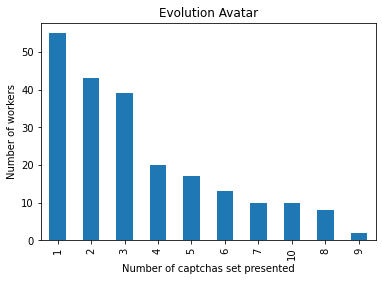

In [ ]:
c1 = df1_captchas_grouped_by_worker.value_counts("INPUT:imageURL")
print(c1)
c1.plot.bar(title ="Evolution Avatar",xlabel = "Number of captchas set presented", ylabel ="Number of workers")


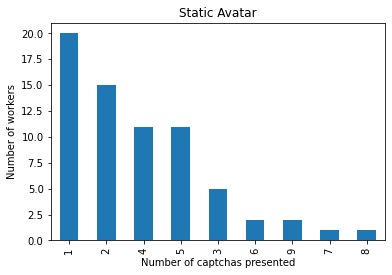

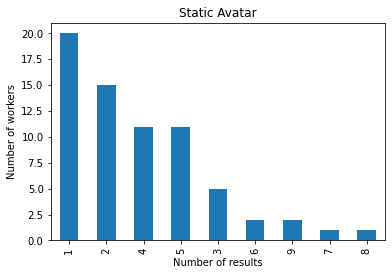

In [ ]:
c2 = df2_captchas_grouped_by_worker.value_counts("INPUT:imageURL")
# print(c2)
c2.plot.bar(title ="Static Avatar",xlabel = "Number of captchas presented", ylabel ="Number of workers")
plt.show()
c2 = df2_captchas_grouped_by_worker.value_counts("OUTPUT:result1")
# print(c2)
c2.plot.bar(title ="Static Avatar",xlabel = "Number of results", ylabel ="Number of workers")


INPUT:imageURL
1     19
2     18
3     17
5      8
4      7
6      6
7      3
8      2
9      2
10     2
dtype: int64


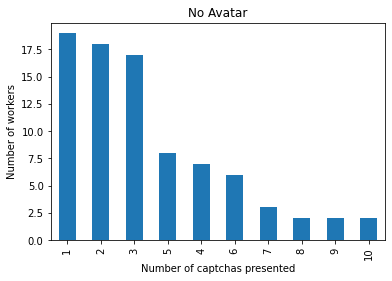

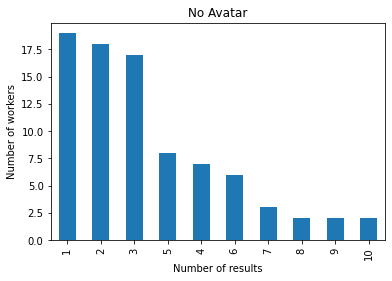

In [ ]:
c3 = df3_captchas_grouped_by_worker.value_counts("INPUT:imageURL")
print(c3)
c3.plot.bar(title ="No Avatar",xlabel = "Number of captchas presented", ylabel ="Number of workers")
plt.show()
c2 = df3_captchas_grouped_by_worker.value_counts("OUTPUT:result1")
# print(c2)
c2.plot.bar(title ="No Avatar",xlabel = "Number of results", ylabel ="Number of workers")